# Setup Notebook

In [ ]:
# --------------------
# File System Imports
# --------------------
from google.colab import drive

from sklearn.experimental import enable_iterative_imputer
# --------------------
# Data Preparation and
# Exploration Imports
# --------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# --------------------
# Model Training and
# Evaluation Imports
# --------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
# mount the google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# specify paths to data
data_dir = '/content/drive/My Drive/Master/Machine_Learning/Ex1/data/'

students_success_data_path = data_dir + 'students_success_data.csv'

amazon_review_training_data_path = data_dir + 'amazon_review_data_training.csv'

congressional_voting_training_data_path = data_dir + 'congressional_voting_data_training.csv'

airplane_training_data_path = data_dir + 'airplane_data_training.csv'

# Student's Academic Success

The [Student's Dropout and Academic Success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset is a classification task with three classes in total: **Dropout**, **Enrolled** and **Graduate**. The task is to predict the class for a given observation based on several features like *Nationality*, *Marital Status* or *Application Mode*. The dataset has 4424 instances and 36 features, all of which are either interval or ratio scales (except the target variable *Target*). All features were already encoded by the contributor of the data.

## Data Preparation and Exploration

In the beginning, we want to read the data from its source and explore it a little bit.

In [ ]:
# read data
students_success_data_raw = pd.read_csv(students_success_data_path,
                                        sep=';')
students_success_data_raw.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

First, we can visualize the distribution of the target variable *Target*, which contains the three class *Dropout*, *Enrolled* and *Graduate*.

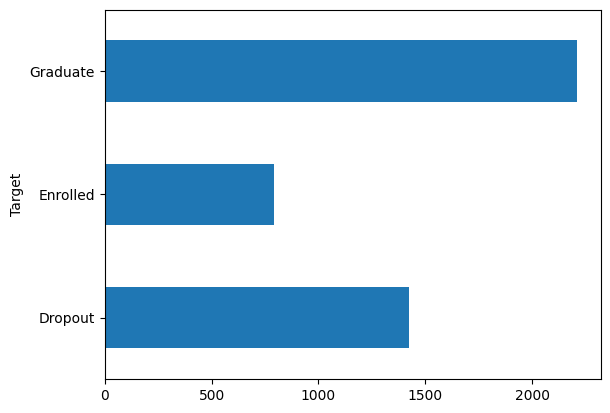

In [ ]:
# plot 'Target' as bar chart
students_success_data_raw.groupby('Target').size().plot(kind = 'barh')
plt.show()

As we can see, “Graduate” is the most frequent class within the data, while “Enrolled” and “Dropout” are less frequent. This means that there might be a slight imbalance between the classes during model training, which could potentially cause issues and might have to be dealt with. We can further visualize some of the other variables like *Age at Enrollment* or *Application Mode* to reveal potential skewness of the data.

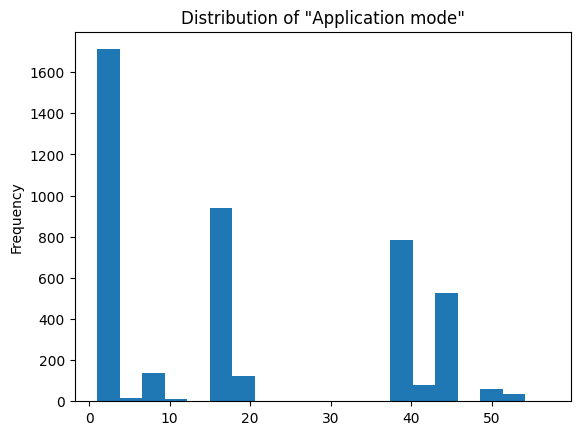

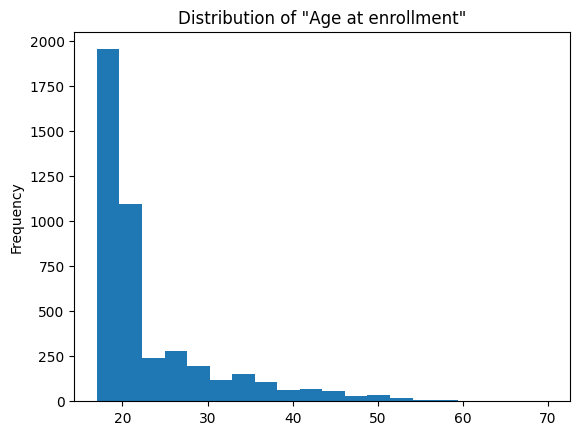

In [ ]:
# plot 'Application mode' as histogram
students_success_data_raw['Application mode'].plot(
    kind='hist', bins=20,
    title='Distribution of \"Application mode\"'
)
plt.show()

# plot 'Age at enrollment' as histogram
students_success_data_raw['Age at enrollment'].plot(
      kind='hist', bins=20,
    title='Distribution of \"Age at enrollment\"'
)
plt.show()

Again, we see that there is indeed a skewness in the data, which can especially be seen in the *Age at Enrollment* column. This means that we have to apply some sort of scaling to the data at a later point.

In the end, we can check whether out data contains any missing values.

In [ ]:
# check for missing values
print(students_success_data_raw.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

As we can see, the dataset does not contain any missing values. We can encode the *Target* variable and map the data into a format that is more suitable for *sklearn*.

In [ ]:
# transform target column
students_success_lookup = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# map data to format for sklearn
students_success_data = {'data': np.array(students_success_data_raw.iloc[:, :-1]),
                         'target': np.array([students_success_lookup[y] for y in students_success_data_raw['Target']]),
                         'feature_names': students_success_data_raw.columns[:-1],
                         'target_names': ['Dropout', 'Enrolled', 'Graduate']}

## Data Splits

For our exercise, we will use different sizes of data splits to work with. In particular, we will perform a 50/50 split, a 70/30 split and a 90/10 split. These splits will serve as training and test data during our model trainings.

In [ ]:
# 50/50 split
X_train_50_students, X_test_50_students, y_train_50_students, y_test_50_students = train_test_split(
    students_success_data['data'],
    students_success_data['target'],
    test_size=0.5,
    random_state=100
)

# 70/30 split
X_train_70_students, X_test_70_students, y_train_70_students, y_test_70_students = train_test_split(
    students_success_data['data'],
    students_success_data['target'],
    test_size=0.3,
    random_state=100
)

# 70/30 split
X_train_90_students, X_test_90_students, y_train_90_students, y_test_90_students = train_test_split(
    students_success_data['data'],
    students_success_data['target'],
    test_size=0.3,
    random_state=100
)

## Model Training

We will now start training a baseline model without any preprocessing steps. Later, we will compare this baseline model to further ones, where some preprocessing steps are applied in advance. We will use 10-fold cross validation to determine the appropriate hyperparameters during the training.

In [ ]:
# baseline model (simple KNN)
knn_baseline_model_students = KNeighborsClassifier()

# parameter grid for baseline
knn_baseline_param_grid_students = {
    'n_neighbors': list(range(1,25,2)),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_baseline_grid_students = GridSearchCV(
    knn_baseline_model_students,
    knn_baseline_param_grid_students,
    cv=10, scoring='accuracy',
    n_jobs=-1
)

# fit the baseline model on 50/50 split
knn_baseline_fit_students = knn_baseline_grid_students.fit(
    X_train_50_students,
    y_train_50_students
)

In [ ]:
print(knn_baseline_fit_students.best_params_)
print(knn_baseline_fit_students.best_score_)

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.6591537238596062


As we can see, our baseline model has a cross-validated accuracy of ~65.9% on the training data.

Now we can add a data scaling step to check whether our model performance improves after scaling. *Sklearn* provides several scaling objects that we will use:

-   **StandardScaler:** standardizes a feature by removing the mean and scaling to a unit variance
-   **MinMaxScaler:** standardizes a feature by scaling all values between the minimum and maximum values of the feature
-   **RobustScaler:** scales features using statistics that are more robust to outliers

Again, we will use 10-fold cross validation to determine the appropriate parameters for the scaling.

In [ ]:
# Pipeline with scaling and KNN
knn_scaling_pipe_students = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=13,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for scaling pipeline
knn_scaling_pipe_param_grid_students = [
    {
        'scaler': [StandardScaler()],
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False]
    },
    {
        'scaler': [MinMaxScaler()],
        'scaler__feature_range': [(0, 1), (0, 10), (0, 100)]
    },
    {
        'scaler': [RobustScaler()],
        'scaler__with_centering': [True, False],
        'scaler__with_scaling': [True, False],
        'scaler__quantile_range': [(25, 75), (0, 10)]
    }
]

# perform grid search with 10-fold cv
knn_scaling_grid_students = GridSearchCV(
    knn_scaling_pipe_students,
    knn_scaling_pipe_param_grid_students,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_scaling_fit_students = knn_scaling_grid_students.fit(
    X_train_50_students,
    y_train_50_students
)

In [ ]:
print(f"Best Parameters: {knn_scaling_fit_students.best_params_}")
print(f"Best Score: {knn_scaling_fit_students.best_score_}")

Best Parameters: {'scaler': StandardScaler(), 'scaler__with_mean': True, 'scaler__with_std': True}
Best Score: 0.7192817251640781


We can see that the most suitable choice for scaling the data was the *Standard Scaler* with the specific parameters that can be seen above. *Sklearn* also provides some objects for feature selection, which we can try:

- **VarianceThreshold:** removes features with low variance
- **SelectKBest:** selects k best features according to score function (ANOVA F for default)
- **PCA**

In [ ]:
# Pipeline with feature selection, scaling and KNN
knn_selection_pipe_students = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', VarianceThreshold()),
    ('model', KNeighborsClassifier(n_neighbors=13,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for selection pipeline
knn_selection_pipe_param_grid_students = [
    {
        'feature_selector': [VarianceThreshold()],
        'feature_selector__threshold': [0.01, 0.05, 0.1]
    },
    {
        'feature_selector': [SelectKBest()],
        'feature_selector__k': [5, 10, 15]
    },
    {
        'feature_selector': [PCA()],
        'feature_selector__n_components': [5, 10, 15]
    }
]

# perform grid search with 10-fold cv
knn_selection_grid_students = GridSearchCV(
    knn_selection_pipe_students,
    knn_selection_pipe_param_grid_students,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_selection_fit_students = knn_selection_grid_students.fit(
    X_train_50_students,
    y_train_50_students
)

In [ ]:
print(f"Best Parameters: {knn_selection_fit_students.best_params_}")
print(f"Best Score: {knn_selection_fit_students.best_score_}")

Best Parameters: {'feature_selector': SelectKBest(), 'feature_selector__k': 15}
Best Score: 0.7482104276221924


As we can see, the feature selection with the 15 best components boosted our cross-validated performance on the training data up to ~74,8% accuracy. Now we can use the scaling method and feature selection method to fit new parameter grids on the different splits that we have created in the beginning to determine, whether the amount of training data has an impact on our performance.

In [ ]:
# knn final pipeline for students success data
knn_final_pipe_students = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selector', SelectKBest(k=15)),
    ('model', KNeighborsClassifier())
])

# knn final parameter grid for students
knn_final_param_grid_students = {
    'model__n_neighbors': list(range(1,25,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_final_grid_students = GridSearchCV(
    knn_final_pipe_students,
    knn_final_param_grid_students,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 70/30 split
knn_final_fit_70 = knn_final_grid_students.fit(
    X_train_70_students,
    y_train_70_students
)

print("70/30 split:")
print(f"Best Parameters: {knn_final_fit_70.best_params_}")
print(f"Best Score: {knn_final_fit_70.best_score_}")
print("-------------------------------------------------")

# fit the model on 90/10 split
knn_final_fit_90 = knn_final_grid_students.fit(
    X_train_90_students,
    y_train_90_students
)

print("90/10 split:")
print(f"Best Parameters: {knn_final_fit_90.best_params_}")
print(f"Best Score: {knn_final_fit_90.best_score_}")

70/30 split:
Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'manhattan', 'model__n_neighbors': 19, 'model__weights': 'uniform'}
Best Score: 0.7503371959494729
-------------------------------------------------
90/10 split:
Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'manhattan', 'model__n_neighbors': 19, 'model__weights': 'uniform'}
Best Score: 0.7503371959494729


We can see that there is a slight increase in the model's performance when using the 70/30 split or the 90/10 split. In summary, the performances of the KNN models were the following:

- Baseline Model: 65,92% (Accuracy)
- Model with Scaling: 71,9% (Accuracy)
- Model with Feature Selection: 74,82% (Accuracy)
- Final Model on 70/30 split: 75,03% (Accuracy)

We can see that with increasing training data, we got a better performance on the training data. However, the performance is exactly the same between the 70/30 split and the 90/10 split.

In the end, we can evaluate our models on the test data with the metrics that we have defined for our exercise.

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data (50/50 split):")
print(f"Accuracy: {accuracy_score(knn_selection_fit_students.predict(X_test_50_students), y_test_50_students)}")
print(f"Precision: {precision_score(knn_selection_fit_students.predict(X_test_50_students), y_test_50_students, average='macro')}")
print(f"Recall: {recall_score(knn_selection_fit_students.predict(X_test_50_students), y_test_50_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_selection_fit_students.predict(X_test_50_students), y_test_50_students, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (50/50 split):
Accuracy: 0.7486437613019892
Precision: 0.6530377231514641
Recall: 0.6955815120421055
F1-Score: 0.6620476513691965
----------------------------------------------------


In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data (70/30 split):")
print(f"Accuracy: {accuracy_score(knn_final_fit_70.predict(X_test_70_students), y_test_70_students)}")
print(f"Precision: {precision_score(knn_final_fit_70.predict(X_test_70_students), y_test_70_students, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_70.predict(X_test_70_students), y_test_70_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_70.predict(X_test_70_students), y_test_70_students, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (70/30 split):
Accuracy: 0.7680722891566265
Precision: 0.6640375982593931
Recall: 0.7286104723530548
F1-Score: 0.6742580704900035
----------------------------------------------------


In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data: (90/10 split)")
print(f"Accuracy: {accuracy_score(knn_final_fit_90.predict(X_test_90_students), y_test_90_students)}")
print(f"Precision: {precision_score(knn_final_fit_90.predict(X_test_90_students), y_test_90_students, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_90.predict(X_test_90_students), y_test_90_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_90.predict(X_test_90_students), y_test_90_students, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data: (90/10 split)
Accuracy: 0.7680722891566265
Precision: 0.6640375982593931
Recall: 0.7286104723530548
F1-Score: 0.6742580704900035
----------------------------------------------------


## Experiment: Impact of the distance metric on model performance

The following code chunk implements the experiment on determining the impact of the distance metric used in KNN on the performance of the model. Therefore, we trained four different classifiers with the same parameters but different distance metrics. Hereby, we used:

- **Euclidean Distance**
- **Manhatten Distance**
- **Cosine Distance**
- **Cityblock Distance**

For the sake of this experiment, we are splitting the data into an 80/20 split and evaluate the model on the test data immediately after the training. Furthermore, since the performance itself does not matter in the context of this experiment but only the **change** in the performance, we are using the default parameters of the KNN and only change the distance metric.

In [ ]:
# 80/20 split
X_train_exp_students, X_test_exp_students, y_train_exp_students, y_test_exp_students = train_test_split(
    students_success_data['data'],
    students_success_data['target'],
    test_size=0.2,
    random_state=100
)

# Model 1: Euclidean Distance
knn_students_euc_model = KNeighborsClassifier(metric='euclidean')
knn_students_euc_fit = knn_students_euc_model.fit(X_train_exp_students,
                                                  y_train_exp_students)

# Model 2: Manhatten Distance
knn_students_man_model = KNeighborsClassifier(metric='manhattan')
knn_students_man_fit = knn_students_man_model.fit(X_train_exp_students,
                                                  y_train_exp_students)

# Model 3: Cosine Distance
knn_students_cos_model = KNeighborsClassifier(metric='cosine')
knn_students_cos_fit = knn_students_cos_model.fit(X_train_exp_students,
                                                  y_train_exp_students)

# Model 4: Cityblock Distance
knn_students_cit_model = KNeighborsClassifier(metric='cityblock')
knn_students_cit_fit = knn_students_cit_model.fit(X_train_exp_students,
                                                  y_train_exp_students)

In [ ]:
# evaluate models on test data
print("----------------------------------------------------")
print("Model Performance on test data (Euclidean Distance):")
print(f"Accuracy: {accuracy_score(knn_students_euc_fit.predict(X_test_exp_students), y_test_exp_students)}")
print(f"Precision: {precision_score(knn_students_euc_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"Recall: {recall_score(knn_students_euc_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_students_euc_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print("----------------------------------------------------")
print("Model Performance on test data (Manhattan Distance):")
print(f"Accuracy: {accuracy_score(knn_students_man_fit.predict(X_test_exp_students), y_test_exp_students)}")
print(f"Precision: {precision_score(knn_students_man_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"Recall: {recall_score(knn_students_man_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_students_man_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print("----------------------------------------------------")
print("Model Performance on test data (Cosine Distance):")
print(f"Accuracy: {accuracy_score(knn_students_cos_fit.predict(X_test_exp_students), y_test_exp_students)}")
print(f"Precision: {precision_score(knn_students_cos_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"Recall: {recall_score(knn_students_cos_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_students_cos_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print("----------------------------------------------------")
print("Model Performance on test data (Cityblock Distance):")
print(f"Accuracy: {accuracy_score(knn_students_cit_fit.predict(X_test_exp_students), y_test_exp_students)}")
print(f"Precision: {precision_score(knn_students_cit_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"Recall: {recall_score(knn_students_cit_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print(f"F1-Score: {f1_score(knn_students_cit_fit.predict(X_test_exp_students), y_test_exp_students, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (Euclidean Distance):
Accuracy: 0.6
Precision: 0.5130794387812587
Recall: 0.5197353792952647
F1-Score: 0.5143438725538437
----------------------------------------------------
Model Performance on test data (Manhattan Distance):
Accuracy: 0.6689265536723163
Precision: 0.5755226654116551
Recall: 0.5928276220983965
F1-Score: 0.5794105675690743
----------------------------------------------------
Model Performance on test data (Cosine Distance):
Accuracy: 0.6305084745762712
Precision: 0.5320031989856401
Recall: 0.5523200793906563
F1-Score: 0.5351508858735067
----------------------------------------------------
Model Performance on test data (Cityblock Distance):
Accuracy: 0.6689265536723163
Precision: 0.5755226654116551
Recall: 0.5928276220983965
F1-Score: 0.5794105675690743
----------------------------------------------------


Above, we can see the results from evaluating the impact of different distance metrics on the performance of KNN models. The results show that Manhatten and Cityblock distances yield the highest accuracy (≈66.89%), precision (≈57.55%), recall (≈59.28%), and F1-score (≈57.94%), indicating that they performed best overall. Cosine distance followed with moderate performance across all metrics, while Euclidean distance resulted in the lowest scores, with an accuracy of 60% and F1-score of 51.43%. These findings suggest that the choice of distance metric significantly influences KNN effectiveness, with Manhattan-based metrics outperforming the others on this particular dataset and in this particular setting.

# Amazon Review

The **Amazon Reviews** dataset aims to map the number of times a certain word/tag has been used in a review on a product on Amazon by a specific person. Thus, it is not a surprise that we have 50 different target classes in the data.

The dataset has already been split up into a training data and a test data. The training data contains 10,001 features and 750 observations.

## Data Preparation and Exploration

In the beginning, we want to read the data from its source and explore it a little bit.

In [ ]:
# read data
amazon_review_data_raw = pd.read_csv(amazon_review_training_data_path)
amazon_review_data_raw.head()

ID  V1  V2  V3  V4  V5  V6  V7  V8  V9  ...  V9992  V9993  V9994  V9995  \
0   0  17   4   8   8   9   4   0   2   3  ...      0      0      0      0   
1   1  21   9   5   8   6   2  16   3  12  ...      0      0      0      2   
2   2   9   7   6   3   8   2   9   4   4  ...      0      0      0      0   
3   3   8   3   5   2   4   3   8   2   4  ...      0      0      1      0   
4   4  15   8   8   4   7   8   4   7   1  ...      0      0      0      0   

   V9996  V9997  V9998  V9999  V10000    Class  
0      0      0      0      1       1     Shea  
1      2      1      0      1       0    Riley  
2      0      0      0      1       1  Chachra  
3      1      0      0      0       0  Agresti  
4      0      0      0      0       0    Nigam  

[5 rows x 10002 columns]

We can see that the dataset has a feature 'ID', which is a unique identifier for a review and therefore not needed for the classification task. We can simply drop thiscolumn.

In [ ]:
# remove 'ID' column
amazon_review_data_raw.drop(columns = ['ID'], inplace=True)
amazon_review_data_raw.head()

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V9992  V9993  V9994  V9995  \
0  17   4   8   8   9   4   0   2   3    5  ...      0      0      0      0   
1  21   9   5   8   6   2  16   3  12    6  ...      0      0      0      2   
2   9   7   6   3   8   2   9   4   4    5  ...      0      0      0      0   
3   8   3   5   2   4   3   8   2   4    4  ...      0      0      1      0   
4  15   8   8   4   7   8   4   7   1    3  ...      0      0      0      0   

   V9996  V9997  V9998  V9999  V10000    Class  
0      0      0      0      1       1     Shea  
1      2      1      0      1       0    Riley  
2      0      0      0      1       1  Chachra  
3      1      0      0      0       0  Agresti  
4      0      0      0      0       0    Nigam  

[5 rows x 10001 columns]

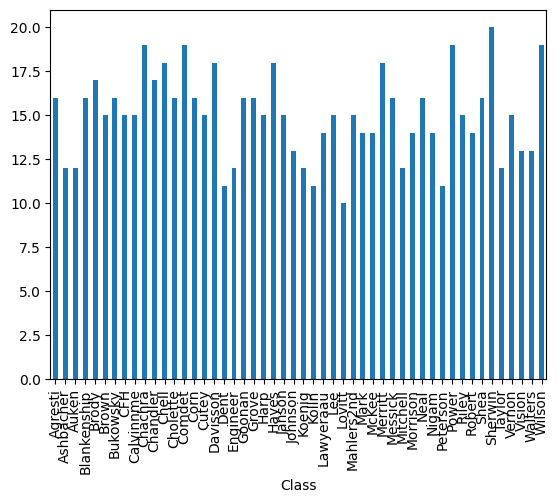

In [ ]:
# plot 'Class' as bar chart
amazon_review_data_raw.groupby('Class').size().plot(kind = 'bar')
plt.show()

Above, we can see that some Amazon users have provided more reviews than others and we therefore again have a certain degree of imbalance within the target variable 'Class'.

Since the target variable is still in a categorical state, we have to encode it to be numeric. We can do this by applying a LabelEncoder() to the variable.

In [ ]:
# transform target column
amazon_review_target_le = LabelEncoder()
amazon_review_data_raw['Class'] = amazon_review_target_le.fit_transform(amazon_review_data_raw['Class'])

amazon_review_data_raw.head()

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  ...  V9992  V9993  V9994  V9995  \
0  17   4   8   8   9   4   0   2   3    5  ...      0      0      0      0   
1  21   9   5   8   6   2  16   3  12    6  ...      0      0      0      2   
2   9   7   6   3   8   2   9   4   4    5  ...      0      0      0      0   
3   8   3   5   2   4   3   8   2   4    4  ...      0      0      1      0   
4  15   8   8   4   7   8   4   7   1    3  ...      0      0      0      0   

   V9996  V9997  V9998  V9999  V10000  Class  
0      0      0      0      1       1     43  
1      2      1      0      1       0     41  
2      0      0      0      1       1      9  
3      1      0      0      0       0      0  
4      0      0      0      0       0     38  

[5 rows x 10001 columns]

Now that all variable are numeric, we can check for missing values in the end.

In [ ]:
# check for missing values
print(f"Number of missing values in the data: {amazon_review_data_raw.isnull().sum().sum()}")

Number of missing values in the data: 0


Since we do not have any missing values in the data, we can transform the data to be suitable for sklearn.

In [ ]:
# map data to format for sklearn
amazon_review_data_target_names = amazon_review_data_raw['Class'].unique()

amazon_review_data = {'data': np.array(amazon_review_data_raw.iloc[:, :-1]),
                      'target': np.array(amazon_review_data_raw['Class']),
                      'feature_names': amazon_review_data_raw.columns[:-1],
                      'target_names': amazon_review_data_target_names}

## Data Splits

Again, we will use different sizes of data splits to work with. In particular, we will perform a 50/50 split, a 70/30 split and a 90/10 split. These splits will serve as training and test data during our model trainings.

In [ ]:
# 50/50 split
X_train_50_amazon, X_val_50_amazon, y_train_50_amazon, y_val_50_amazon = train_test_split(
    amazon_review_data['data'],
    amazon_review_data['target'],
    test_size=0.5,
    random_state=100
)

# 70/30 split
X_train_70_amazon, X_val_70_amazon, y_train_70_amazon, y_val_70_amazon = train_test_split(
    amazon_review_data['data'],
    amazon_review_data['target'],
    test_size=0.3,
    random_state=100
)

# 70/30 split
X_train_90_amazon, X_val_90_amazon, y_train_90_amazon, y_val_90_amazon = train_test_split(
    amazon_review_data['data'],
    amazon_review_data['target'],
    test_size=0.3,
    random_state=100
)

## Model Training

Again, we will start training a baseline model without any preprocessing steps. Later, we will compare this baseline model to further ones, where some preprocessing steps are applied in advance. We will use 10-fold cross validation to determine the appropriate hyperparameters during the training. Since the dataset is much larger than the **Student's Dropout and Academic Success** data, we will reduce the maximum number of neighbors in the grid search to 15.

In [ ]:
# baseline model (simple KNN)
knn_baseline_model_amazon = KNeighborsClassifier()

# parameter grid for baseline
knn_baseline_param_grid_amazon = {
    'n_neighbors': list(range(1,15,2)),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_baseline_grid_amazon = GridSearchCV(
    knn_baseline_model_amazon,
    knn_baseline_param_grid_amazon,
    cv=10, scoring='accuracy',
    n_jobs=-1
)

# fit the baseline model on 50/50 split
knn_baseline_fit_amazon= knn_baseline_grid_amazon.fit(
    X_train_50_amazon,
    y_train_50_amazon
)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print(f"Best Parameters: {knn_baseline_fit_amazon.best_params_}")
print(f"Best Score: {knn_baseline_fit_amazon.best_score_}")

Best Parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.322475106685633


As we can see, our baseline model has a cross-validated accuracy of ~32,2% on the training data, which is not exactly great. This indicates that KNN might not be the best choice for this dataset.

However, now we can add a data scaling step to check whether our model performance improves after scaling. *Sklearn* provides several scaling objects that we will use:

-   **StandardScaler:** standardizes a feature by removing the mean and scaling to a unit variance
-   **MinMaxScaler:** standardizes a feature by scaling all values between the minimum and maximum values of the feature
-   **RobustScaler:** scales features using statistics that are more robust to outliers

Again, we will use 10-fold cross validation to determine the appropriate parameters for the scaling.

In [ ]:
# Pipeline with scaling and KNN
knn_scaling_pipe_amazon = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=9,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for scaling pipeline
knn_scaling_pipe_param_grid_amazon = [
    {
        'scaler': [StandardScaler()],
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False]
    },
    {
        'scaler': [MinMaxScaler()],
        'scaler__feature_range': [(0, 1), (0, 10), (0, 100)]
    },
    {
        'scaler': [RobustScaler()],
        'scaler__with_centering': [True, False],
        'scaler__with_scaling': [True, False],
        'scaler__quantile_range': [(25, 75), (0, 10)]
    }
]

# perform grid search with 10-fold cv
knn_scaling_grid_amazon = GridSearchCV(
    knn_scaling_pipe_amazon,
    knn_scaling_pipe_param_grid_amazon,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_scaling_fit_amazon = knn_scaling_grid_amazon.fit(
    X_train_50_amazon,
    y_train_50_amazon
)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print(f"Best Parameters: {knn_scaling_fit_amazon.best_params_}")
print(f"Best Score: {knn_scaling_fit_amazon.best_score_}")

Best Parameters: {'scaler': StandardScaler(), 'scaler__with_mean': True, 'scaler__with_std': False}
Best Score: 0.322475106685633


We can see that the most suitable choice for scaling the data was the StandardScaler with the specific parameters that can be seen above. *Sklearn* also provides some objects for feature selection, which we can try:

- **VarianceThreshold:** removes features with low variance
- **SelectKBest:** selects k best features according to score function (ANOVA F for default)
- **PCA**

In [ ]:
# Pipeline with feature selection, scaling and KNN
knn_selection_pipe_amazon = Pipeline([
    ('scaler', StandardScaler(with_std=False)),
    ('feature_selector', VarianceThreshold()),
    ('model', KNeighborsClassifier(n_neighbors=13,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for selection pipeline
knn_selection_pipe_param_grid_amazon = [
    {
        'feature_selector': [VarianceThreshold()],
        'feature_selector__threshold': [0.01, 0.05, 0.1]
    },
    {
        'feature_selector': [SelectKBest()],
        'feature_selector__k': [5, 10, 15]
    },
    {
        'feature_selector': [PCA()],
        'feature_selector__n_components': [5, 10, 15]
    }
]

# perform grid search with 10-fold cv
knn_selection_grid_amazon = GridSearchCV(
    knn_selection_pipe_amazon,
    knn_selection_pipe_param_grid_amazon,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_selection_fit_amazon = knn_selection_grid_amazon.fit(
    X_train_50_amazon,
    y_train_50_amazon
)

In [ ]:
print(f"Best Parameters: {knn_selection_fit_amazon.best_params_}")
print(f"Best Score: {knn_selection_fit_amazon.best_score_}")

Best Parameters: {'feature_selector': VarianceThreshold(), 'feature_selector__threshold': 0.05}
Best Score: 0.3278805120910384


As we can see, the feature selection with the VarianceThreshold boosted our cross-validated performance on the training data up to 32,79% accuracy, which still is not exactly great. Now we can use the scaling method and feature selection method to fit new parameter grids on the different splits that we have created in the beginning to determine, whether the amount of training data has an impact on our performance.

In [ ]:
# knn final pipeline for amazon reviews data
knn_final_pipe_amazon = Pipeline([
    ('scaler', StandardScaler(with_std=False)),
    ('feature_selector', VarianceThreshold(threshold=0.05)),
    ('model', KNeighborsClassifier())
])

# knn final parameter grid for amazon review
knn_final_param_grid_amazon= {
    'model__n_neighbors': list(range(1,15,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_final_grid_amazon = GridSearchCV(
    knn_final_pipe_amazon,
    knn_final_param_grid_amazon,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 70/30 split
knn_final_fit_70_amazon = knn_final_grid_amazon.fit(
    X_train_70_amazon,
    y_train_70_amazon
)

print("70/30 split:")
print(f"Best Parameters: {knn_final_fit_70_amazon.best_params_}")
print(f"Best Score: {knn_final_fit_70_amazon.best_score_}")
print("-------------------------------------------------")

# fit the model on 90/10 split
knn_final_fit_90_amazon = knn_final_grid_amazon.fit(
    X_train_90_amazon,
    y_train_90_amazon
)

print("90/10 split:")
print(f"Best Parameters: {knn_final_fit_90_amazon.best_params_}")
print(f"Best Score: {knn_final_fit_90_amazon.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

We managed to boost the training accuracy of the KNN model from ~32,2% up to ~37,33, which is still not a very great result. Therefore, I consider KNN as not suitable for the underlying data and would assume that more advanced machine learning techniques (or preprocessing and feature engineering methods) would be necessary to find a well performing model.

Nonetheless, we can try evaluating the model on the validation data.

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data:")
print(f"Accuracy: {accuracy_score(knn_selection_fit_amazon.predict(X_val_50_amazon), y_val_50_amazon)}")
print(f"Precision: {precision_score(knn_selection_fit_amazon.predict(X_val_50_amazon), y_val_50_amazon, average='macro')}")
print(f"Recall: {recall_score(knn_selection_fit_amazon.predict(X_val_50_amazon), y_val_50_amazon, average='macro')}")
print(f"F1-Score: {f1_score(knn_selection_fit_amazon.predict(X_val_50_amazon), y_val_50_amazon, average='macro')}")
print("----------------------------------------------------")

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data:")
print(f"Accuracy: {accuracy_score(knn_final_fit_70_amazon.predict(X_val_70_amazon), y_val_70_amazon)}")
print(f"Precision: {precision_score(knn_final_fit_70_amazon.predict(X_val_70_amazon), y_val_70_amazon, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_70_amazon.predict(X_val_70_amazon), y_val_70_amazon, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_70_amazon.predict(X_val_70_amazon), y_val_70_amazon, average='macro')}")
print("----------------------------------------------------")

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data:")
print(f"Accuracy: {accuracy_score(knn_final_fit_90_amazon.predict(X_val_90_amazon), y_val_90_amazon)}")
print(f"Precision: {precision_score(knn_final_fit_90_amazon.predict(X_val_90_amazon), y_val_90_amazon, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_90_amazon.predict(X_val_90_amazon), y_val_90_amazon, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_90_amazon.predict(X_val_90_amazon), y_val_90_amazon, average='macro')}")
print("----------------------------------------------------")

# Congressional Voting


The Congressional Voting dataset aims to predict the political party a congress member is associated with based on past voting decisions on selected topics. The dataset has a total of 218 instances and 18 attributes. Each feature has a categorical data type and can assume the value "y" or "n".

## Data Preparation

In [ ]:
# read data
congressional_voting_data_raw = pd.read_csv(congressional_voting_training_data_path)
congressional_voting_data_raw.head()

ID       class handicapped-infants water-project-cost-sharing  \
0  362    democrat                   y                          n   
1   86    democrat                   n                          n   
2  264    democrat                   y                          n   
3  258  republican                   n                          n   
4  381    democrat                   y                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 y                    n               y   
1                                 y                    n               y   
2                                 y                    n               n   
3                                 n                    y               y   
4                                 y                    n               n   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       y   
1                           y                       n   
2                           n                       y   
3                           n                       n   
4                           y                 unknown   

  aid-to-nicaraguan-contras mx-missile immigration  \
0                         n          y           y   
1                         n          n           y   
2                         y          y           n   
3                         n          n           n   
4                         y          y           n   

  synfuels-crporation-cutback education-spending superfund-right-to-sue crime  \
0                           n                  n                      y     y   
1                           y                  y                      y     y   
2                           n                  n                      n     n   
3                           n                  y                      n     y   
4                           y                  n                      y     n   

  duty-free-exports export-administration-act-south-africa  
0                 n                                unknown  
1                 n                                      y  
2                 y                                unknown  
3           unknown                                      y  
4                 y                                      y

In the data, there are several missing values, which are denoted as 'unknown' within the features. We will try different strategies to deal with them in a later section but there are two rows, which nearly only consists of the value 'unknown', which is why we decided to remove them beforehand.

In [ ]:
# remove rows with almost every feature being unknown (rows with 'ID' 184
# and 249)
congressional_voting_data_raw.drop(
    congressional_voting_data_raw[np.isin(congressional_voting_data_raw['ID'],
    [184, 249])].index, inplace=True)

We can also drop 'ID', since it is not needed for the task

In [ ]:
# remove id column
congressional_voting_data_raw.drop(columns=['ID'], inplace=True)

For handling the missing values, we came up with two main strategies:

- Treating them as a third category: 'yes', 'no' and 'unknown'
- Imputing them with the help of sklearn

In the following, we will try both of these strategies and compare them in terms of performance.

In [ ]:
# Dataset 1: third category
congressional_voting_data_raw_third_category = congressional_voting_data_raw.copy()

# Dataset 2: imputing
congression_voting_data_raw_imputed = congressional_voting_data_raw.copy()
congression_voting_data_raw_imputed = congression_voting_data_raw_imputed.replace('unknown', np.nan)

In [ ]:
# transform feature columns
congression_voting_data_raw_imputed.iloc[:, 1:] = congression_voting_data_raw_imputed.iloc[:, 1:].replace({'y': 1, 'n': 0})
congressional_voting_data_raw_third_category.iloc[:, 1:] = congressional_voting_data_raw_third_category.iloc[:, 1:].replace({'y': 1, 'n': 0, 'unknown': 2})

# transform target column
congressional_voting_lookup = {'democrat': 0, 'republican': 1}

# map data to format for sklearn
congressional_voting_data_imputed = {
  'data': np.array(congression_voting_data_raw_imputed.iloc[:, 1:]),
  'target': np.array([congressional_voting_lookup[y] for y in congression_voting_data_raw_imputed['class']]),
  'feature_names': congression_voting_data_raw_imputed.columns[1:],
  'target_names': ['democrat', 'republican']
}

congressional_voting_data_third_category = {
  'data': np.array(congressional_voting_data_raw_third_category.iloc[:, 1:]),
  'target': np.array([congressional_voting_lookup[y] for y in congressional_voting_data_raw_third_category['class']]),
  'feature_names': congressional_voting_data_raw_third_category.columns[1:],
  'target_names': ['democrat', 'republican']
}

<ipython-input-52-520c119a3e6a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  congression_voting_data_raw_imputed.iloc[:, 1:] = congression_voting_data_raw_imputed.iloc[:, 1:].replace({'y': 1, 'n': 0})
<ipython-input-52-520c119a3e6a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  congressional_voting_data_raw_third_category.iloc[:, 1:] = congressional_voting_data_raw_third_category.iloc[:, 1:].replace({'y': 1, 'n': 0, 'unknown': 2})


## Data Splits

As previously, we will use different sizes of data splits to work with. In particular, we will perform a 50/50 split, a 70/30 split and a 90/10 split. These splits will serve as training and test data during our model trainings.

In [ ]:
# --------------------------------
# Splits for imputed set
# --------------------------------
X_train_50_voting_imputed, X_test_50_voting_imputed, y_train_50_voting_imputed, y_test_50_voting_imputed = train_test_split(
    congressional_voting_data_imputed['data'],
    congressional_voting_data_imputed['target'],
    test_size=0.5,
    random_state=100
)

X_train_70_voting_imputed, X_test_70_voting_imputed, y_train_70_voting_imputed, y_test_70_voting_imputed = train_test_split(
    congressional_voting_data_imputed['data'],
    congressional_voting_data_imputed['target'],
    test_size=0.3,
    random_state=100
)

X_train_90_voting_imputed, X_test_90_voting_imputed, y_train_90_voting_imputed, y_test_90_voting_imputed = train_test_split(
    congressional_voting_data_imputed['data'],
    congressional_voting_data_imputed['target'],
    test_size=0.1,
    random_state=100
)

# --------------------------------
# Splits for third category set
# --------------------------------
X_train_50_voting_third_category, X_test_50_voting_third_category, y_train_50_voting_third_category, y_test_50_voting_third_category = train_test_split(
    congressional_voting_data_third_category['data'],
    congressional_voting_data_third_category['target'],
    test_size=0.5,
    random_state=100
)

X_train_70_voting_third_category, X_test_70_voting_third_category, y_train_70_voting_third_category, y_test_70_voting_third_category = train_test_split(
    congressional_voting_data_third_category['data'],
    congressional_voting_data_third_category['target'],
    test_size=0.3,
    random_state=100
)

X_train_90_voting_third_category, X_test_90_voting_third_category, y_train_90_voting_third_category, y_test_90_voting_third_category = train_test_split(
    congressional_voting_data_third_category['data'],
    congressional_voting_data_third_category['target'],
    test_size=0.1,
    random_state=100
)

## Model Training

As in the previous datasets, we will start with a baseline model and add scaling and feature selection to the model later. In case of the set that requires data imputation, we will use a strategy to fill up the values with the most common one, since mean oder median would not make sense with categorical data.

### Missing Value Strategy 1

In [ ]:
# baseline model (simple KNN)
knn_baseline_model_voting_strat_1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', KNeighborsClassifier())
])


# parameter grid for baseline
knn_baseline_param_grid_voting_strat_1 = {
    'model__n_neighbors': list(range(1,25,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_baseline_grid_voting_strat_1 = GridSearchCV(
    knn_baseline_model_voting_strat_1,
    knn_baseline_param_grid_voting_strat_1,
    cv=10, scoring='accuracy',
    n_jobs=-1
)

# fit the baseline model on 50/50 split
knn_baseline_fit_voting_strat_1= knn_baseline_grid_voting_strat_1.fit(
    X_train_50_voting_imputed,
    y_train_50_voting_imputed
)

In [ ]:
print(f"Best Parameters: {knn_baseline_fit_voting_strat_1.best_params_}")
print(f"Best Score: {knn_baseline_fit_voting_strat_1.best_score_}")

Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'euclidean', 'model__n_neighbors': 1, 'model__weights': 'uniform'}
Best Score: 0.9445454545454547


We can see that the model is already performing pretty well with a cross-validated training accuracy of ~94,45%. Scaling would not make sense here, since the data can either be 0 or 1. Thus, we only have to add feature selection to the pipeline.

In [ ]:
# Pipeline with feature selection and KNN
knn_selection_pipe_voting_strat_1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('feature_selector', VarianceThreshold()),
    ('model', KNeighborsClassifier(n_neighbors=1,
                                   weights='uniform',
                                   algorithm='ball_tree',
                                   metric='euclidean'))
])

# parameter grid for feature selection pipeline
knn_selection_pipe_param_grid_voting_strat_1 = [
    {
        'feature_selector': [VarianceThreshold()],
        'feature_selector__threshold': [0.01, 0.05, 0.1]
    },
    {
        'feature_selector': [SelectKBest()],
        'feature_selector__k': [5, 10, 15]
    },
    {
        'feature_selector': [PCA()],
        'feature_selector__n_components': [5, 10, 15]
    }
]

# perform grid search with 10-fold cv
knn_selection_grid_voting_strat_1 = GridSearchCV(
    knn_selection_pipe_voting_strat_1,
    knn_selection_pipe_param_grid_voting_strat_1,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_selection_fit_voting_strat_1 = knn_selection_grid_voting_strat_1.fit(
    X_train_50_voting_imputed,
    y_train_50_voting_imputed
)

In [ ]:
print(f"Best Parameters: {knn_selection_fit_voting_strat_1.best_params_}")
print(f"Best Score: {knn_selection_fit_voting_strat_1.best_score_}")

Best Parameters: {'feature_selector': SelectKBest(), 'feature_selector__k': 10}
Best Score: 0.9536363636363637


With the feature selection, we managed to achieve a cross-validated training accuracy of ~95,36%.

In [ ]:
# knn final pipeline
knn_final_pipe_voting_strat_1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('feature_selector', SelectKBest(k=10)),
    ('model', KNeighborsClassifier())
])

# knn final parameter grid for students
knn_final_param_grid_voting_strat_1= {
    'model__n_neighbors': list(range(1,25,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_final_grid_voting_strat_1 = GridSearchCV(
    knn_final_pipe_voting_strat_1,
    knn_final_param_grid_voting_strat_1,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 70/30 split
knn_final_fit_70_voting_strat_1 = knn_final_grid_voting_strat_1.fit(
    X_train_70_voting_imputed,
    y_train_70_voting_imputed
)

print("70/30 split:")
print(f"Best Parameters: {knn_final_fit_70_voting_strat_1.best_params_}")
print(f"Best Score: {knn_final_fit_70_voting_strat_1.best_score_}")
print("-------------------------------------------------")

# fit the model on 90/10 split
knn_final_fit_90_voting_strat_1 = knn_final_grid_voting_strat_1.fit(
    X_train_90_voting_imputed,
    y_train_90_voting_imputed
)

print("90/10 split:")
print(f"Best Parameters: {knn_final_fit_90_voting_strat_1.best_params_}")
print(f"Best Score: {knn_final_fit_90_voting_strat_1.best_score_}")

70/30 split:
Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Best Score: 0.95375
-------------------------------------------------
90/10 split:
Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'euclidean', 'model__n_neighbors': 21, 'model__weights': 'distance'}
Best Score: 0.9639473684210526


We can see that we found a model that performs very well with a cross-validated training accuracy of ~96,4%.

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data (50/50 split):")
print(f"Accuracy: {accuracy_score(knn_selection_fit_voting_strat_1.predict(X_test_50_voting_imputed), y_test_50_voting_imputed)}")
print(f"Precision: {precision_score(knn_selection_fit_voting_strat_1.predict(X_test_50_voting_imputed), y_test_50_voting_imputed, average='macro')}")
print(f"Recall: {recall_score(knn_selection_fit_voting_strat_1.predict(X_test_50_voting_imputed), y_test_50_voting_imputed, average='macro')}")
print(f"F1-Score: {f1_score(knn_selection_fit_voting_strat_1.predict(X_test_50_voting_imputed), y_test_50_voting_imputed, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (50/50 split):
Accuracy: 0.9351851851851852
Precision: 0.9368965517241379
Recall: 0.9346483704974271
F1-Score: 0.9350459661482946
----------------------------------------------------


In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data (70/30 split):")
print(f"Accuracy: {accuracy_score(knn_final_fit_70_voting_strat_1.predict(X_test_70_voting_imputed), y_test_70_voting_imputed)}")
print(f"Precision: {precision_score(knn_final_fit_70_voting_strat_1.predict(X_test_70_voting_imputed), y_test_70_voting_imputed, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_70_voting_strat_1.predict(X_test_70_voting_imputed), y_test_70_voting_imputed, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_70_voting_strat_1.predict(X_test_70_voting_imputed), y_test_70_voting_imputed, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (70/30 split):
Accuracy: 0.9538461538461539
Precision: 0.9551656920077972
Recall: 0.9507722007722008
F1-Score: 0.9527272727272726
----------------------------------------------------


In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data (90/10 split):")
print(f"Accuracy: {accuracy_score(knn_final_fit_90_voting_strat_1.predict(X_test_90_voting_imputed), y_test_90_voting_imputed)}")
print(f"Precision: {precision_score(knn_final_fit_90_voting_strat_1.predict(X_test_90_voting_imputed), y_test_90_voting_imputed, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_90_voting_strat_1.predict(X_test_90_voting_imputed), y_test_90_voting_imputed, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_90_voting_strat_1.predict(X_test_90_voting_imputed), y_test_90_voting_imputed, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data (90/10 split):
Accuracy: 0.9090909090909091
Precision: 0.8952380952380952
Recall: 0.8952380952380952
F1-Score: 0.8952380952380952
----------------------------------------------------


### Missing Value Strategy 2

In [ ]:
# baseline model (simple KNN)
knn_baseline_model_voting_strat_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', KNeighborsClassifier())
])


# parameter grid for baseline
knn_baseline_param_grid_voting_strat_2 = {
    'model__n_neighbors': list(range(1,25,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_baseline_grid_voting_strat_2 = GridSearchCV(
    knn_baseline_model_voting_strat_2,
    knn_baseline_param_grid_voting_strat_2,
    cv=10, scoring='accuracy',
    n_jobs=-1
)

# fit the baseline model on 50/50 split
knn_baseline_fit_voting_strat_2= knn_baseline_grid_voting_strat_2.fit(
    X_train_50_voting_third_category,
    y_train_50_voting_third_category
)

In [ ]:
print(f"Best Parameters: {knn_baseline_fit_voting_strat_2.best_params_}")
print(f"Best Score: {knn_baseline_fit_voting_strat_2.best_score_}")

Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'manhattan', 'model__n_neighbors': 1, 'model__weights': 'uniform'}
Best Score: 0.9263636363636364


We can see that the baseline model aready performs a little worse for the second missing values strategy.

In [ ]:
# Pipeline with feature selection and KNN
knn_selection_pipe_voting_strat_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('feature_selector', VarianceThreshold()),
    ('model', KNeighborsClassifier(n_neighbors=1,
                                   weights='uniform',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for feature selection pipeline
knn_selection_pipe_param_grid_voting_strat_2 = [
    {
        'feature_selector': [VarianceThreshold()],
        'feature_selector__threshold': [0.01, 0.05, 0.1]
    },
    {
        'feature_selector': [SelectKBest()],
        'feature_selector__k': [5, 10, 15]
    },
    {
        'feature_selector': [PCA()],
        'feature_selector__n_components': [5, 10, 15]
    }
]

# perform grid search with 10-fold cv
knn_selection_grid_voting_strat_2 = GridSearchCV(
    knn_selection_pipe_voting_strat_2,
    knn_selection_pipe_param_grid_voting_strat_2,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_selection_fit_voting_strat_2 = knn_selection_grid_voting_strat_2.fit(
    X_train_50_voting_third_category,
    y_train_50_voting_third_category
)

In [ ]:
print(f"Best Parameters: {knn_selection_fit_voting_strat_2.best_params_}")
print(f"Best Score: {knn_selection_fit_voting_strat_2.best_score_}")

Best Parameters: {'feature_selector': SelectKBest(), 'feature_selector__k': 10}
Best Score: 0.9527272727272728


After feature extraction the performance was again boosted up to ~95,27% accuracy, which is now comparable to the first missing values strategy.

In [ ]:
# knn final pipeline
knn_final_pipe_voting_strat_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('feature_selector', SelectKBest(k=10)),
    ('model', KNeighborsClassifier())
])

# knn final parameter grid for students
knn_final_param_grid_voting_strat_2= {
    'model__n_neighbors': list(range(1,25,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_final_grid_voting_strat_2 = GridSearchCV(
    knn_final_pipe_voting_strat_2,
    knn_final_param_grid_voting_strat_2,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 70/30 split
knn_final_fit_70_voting_strat_2 = knn_final_grid_voting_strat_2.fit(
    X_train_70_voting_third_category,
    y_train_70_voting_third_category
)

print("70/30 split:")
print(f"Best Parameters: {knn_final_fit_70_voting_strat_2.best_params_}")
print(f"Best Score: {knn_final_fit_70_voting_strat_2.best_score_}")
print("-------------------------------------------------")

# fit the model on 90/10 split
knn_final_fit_90_voting_strat_2 = knn_final_grid_voting_strat_2.fit(
    X_train_90_voting_third_category,
    y_train_90_voting_third_category
)

print("90/10 split:")
print(f"Best Parameters: {knn_final_fit_90_voting_strat_2.best_params_}")
print(f"Best Score: {knn_final_fit_90_voting_strat_2.best_score_}")

70/30 split:
Best Parameters: {'model__algorithm': 'brute', 'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'uniform'}
Best Score: 0.9470833333333333
-------------------------------------------------
90/10 split:
Best Parameters: {'model__algorithm': 'ball_tree', 'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best Score: 0.9481578947368421


We can still see that the performances are comparable but still the first one outperforms the second one.

In [ ]:
print("----------------------------------------------------")
print("Model Performance on test data:")
print(f"Accuracy: {accuracy_score(knn_final_fit_90_voting_strat_2.predict(X_test_90_voting_third_category), y_test_90_voting_third_category)}")
print(f"Precision: {precision_score(knn_final_fit_90_voting_strat_2.predict(X_test_90_voting_third_category), y_test_90_voting_third_category, average='macro')}")
print(f"Recall: {recall_score(knn_final_fit_90_voting_strat_2.predict(X_test_90_voting_third_category), y_test_90_voting_third_category, average='macro')}")
print(f"F1-Score: {f1_score(knn_final_fit_90_voting_strat_2.predict(X_test_90_voting_third_category), y_test_90_voting_third_category, average='macro')}")
print("----------------------------------------------------")

----------------------------------------------------
Model Performance on test data:
Accuracy: 0.9545454545454546
Precision: 0.9666666666666667
Recall: 0.9375
F1-Score: 0.9494252873563218
----------------------------------------------------


# Airplane Passenger Satisfaction

The **Airplane Passenger Satisfaction** data was drawn from a survey and aims to determine which factors are correlated to satisfied or dissatisfied customers. The dataset contains 24 input features and has already been split up into a training and a test set. Hereby, the training data consists of 103.904 instances while the test set contains the remaining 25.975 instances.

In [ ]:
# read data
airplane_data_raw = pd.read_csv(airplane_training_data_path)
airplane_data_raw.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

The input features 'Unnamed: 0' and 'id' are unique identifiers for the corresponding passenger and are not important for our classification problem, which is why they can simply be removed.

In [ ]:
airplane_data_raw.drop(columns=['Unnamed: 0', 'id'], inplace=True)

## Missing Values

Now we can check the training data for missing values.

In [ ]:
airplane_data_raw.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

As we can see, there are 310 missing values in the 'Arrival Delay in Minutes' feature.

In [ ]:
print(f"Percentage of rows with missing values: {round(310 / len(airplane_data_raw) * 100, 4)}%")

Percentage of rows with missing values: 0.2984%


Since there are only missing values in ~0.3% of rows, one way to deal with those is to simply remove the rows that contain the missing values. Since the percentage value is very small, we won't loose a considerable amount of data here.

In [ ]:
airplane_data_raw.dropna(inplace=True)

In [ ]:
airplane_data_raw.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Data Exploration

Now that we do not have any missing values in the data, we are able to explore it in further depth.

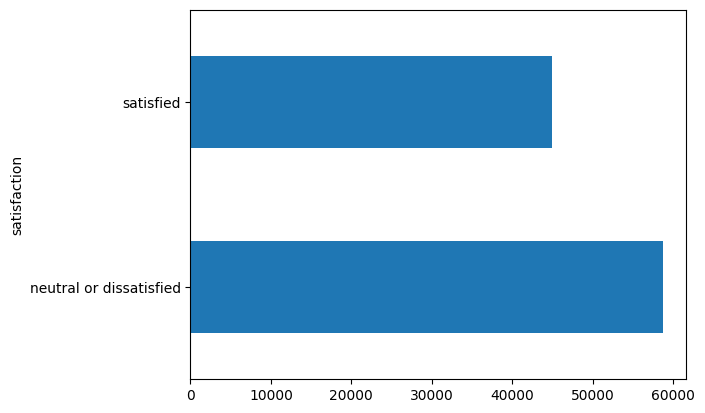

In [ ]:
# plot the binary target column
airplane_data_raw['satisfaction'].value_counts().plot(kind='barh')
plt.show()

The plot above shows the distribution of the binary target variable 'satisfaction'. We can see that there is a slight imbalance in the classes as we have already experienced with the **Student's Dropout and Academic Success** data.

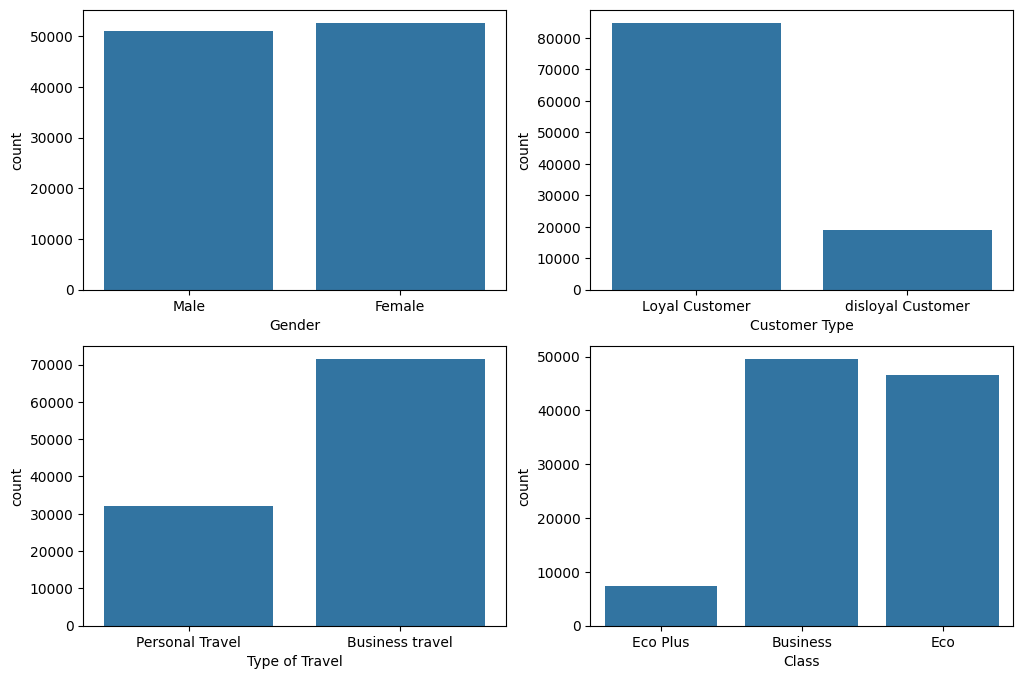

In [ ]:
# plot categorical columns of the data
airplane_categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axes = plt.subplots(nrows=int(len(airplane_categorical_cols)/2), ncols=2,
                         figsize=(12, 2*len(airplane_categorical_cols)))
for i, var in enumerate(airplane_categorical_cols):
  sns.countplot(x=var, data=airplane_data_raw, ax=axes[i//2, i%2])

We can observe large imbalances in all categorical features except 'Gender', which is nearly equally distributed.

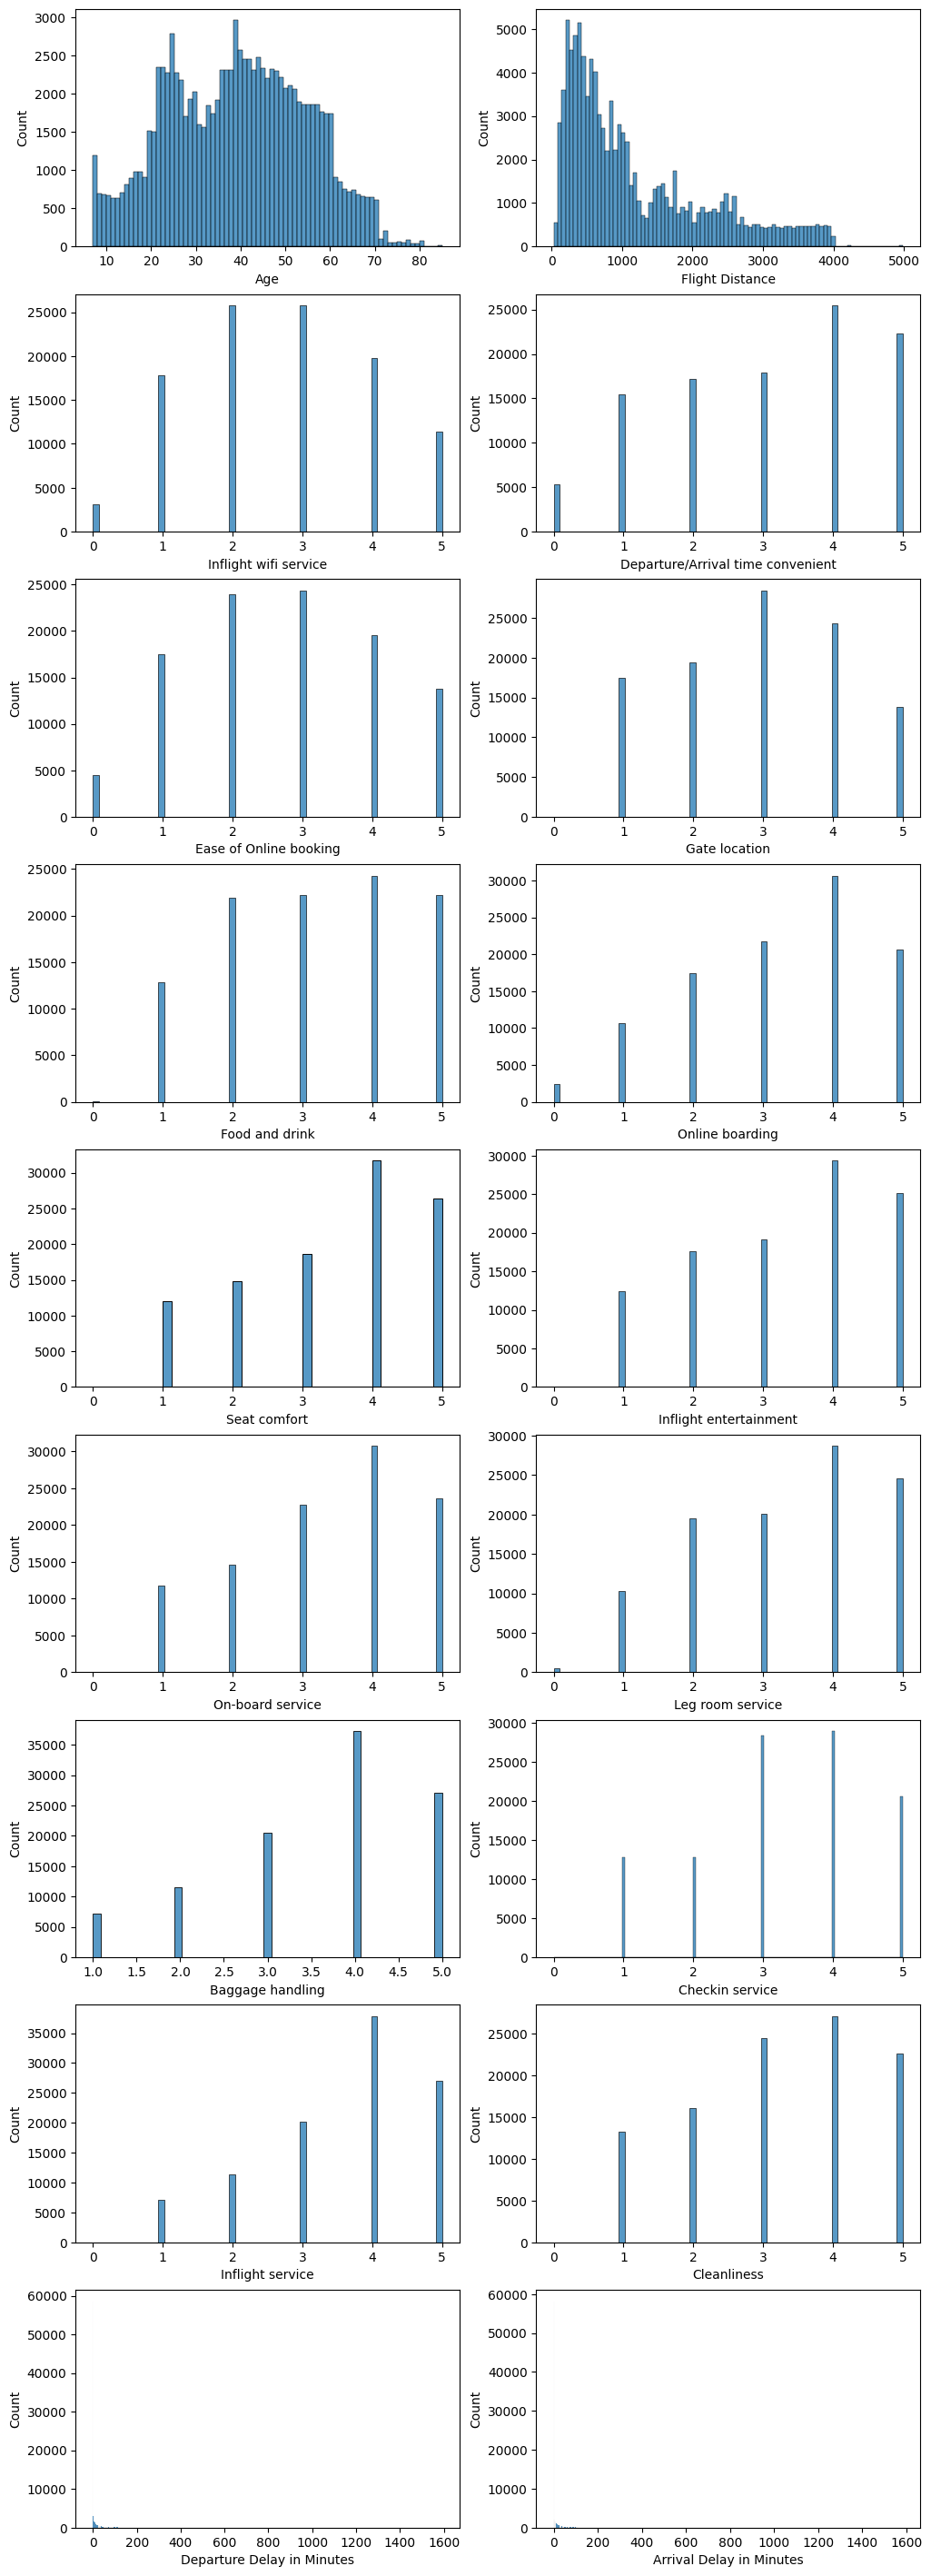

In [ ]:
# plot numerical columns
airplane_numerical_cols = airplane_data_raw.columns[~np.isin(airplane_data_raw.columns, ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])]

fig, axes = plt.subplots(nrows=int(len(airplane_numerical_cols)/2), ncols=2,
                         figsize=(12, 2*len(airplane_numerical_cols)))
for i, var in enumerate(airplane_numerical_cols):
  sns.histplot(x=var, data=airplane_data_raw, ax=axes[i//2, i%2])

In the numeric variable plot above, we can see that there is more skewness in the data, which can for instance be seen in 'Flight Distance'. There are much more shorter flights than longer ones. This highlights that there is need for some sort of scaling later on.

In [ ]:
# transform categorical features
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
  airplane_data_raw[col] = LabelEncoder().fit_transform(airplane_data_raw[col])

# transform target column
airplane_data_lookup = {'neutral or dissatisfied': 0, 'satisfied': 1}

# map data to format for sklearn
airplane_data = {'data': np.array(airplane_data_raw.iloc[:, :-1]),
                 'target': np.array(airplane_data_raw['satisfaction']),
                 'feature_names': airplane_data_raw.columns[:-1],
                 'target_names': ['neutral or dissatisfied', 'satisfied']}

## Data Splits

We will again use different training data sizes. In particular, we are again using the 50/50 split, the 70/30 split and the 90/10 split.

In [ ]:
# 50/50 split
X_train_50_airplane, X_test_50_airplane, y_train_50_airplane, y_val_50_airplane = train_test_split(
    airplane_data['data'],
    airplane_data['target'],
    test_size=0.5,
    random_state=100
)

# 70/30 split
X_train_70_airplane, X_test_70_airplane, y_train_70_airplane, y_val_70_airplane = train_test_split(
    airplane_data['data'],
    airplane_data['target'],
    test_size=0.3,
    random_state=100
)

# 70/30 split
X_train_90_airplane, X_test_90_airplane, y_train_90_airplane, y_val_90_airplane = train_test_split(
    airplane_data['data'],
    airplane_data['target'],
    test_size=0.1,
    random_state=100
)

## Model Training

We will again start by training a baseline model in the same way as with the other datasets. Since the data is very large and has a huge number of observations, we are only considering a maximum amount of 9 neighbors to work with.

In [ ]:
# build baseline model
knn_baseline_model_airplane = KNeighborsClassifier()

# param grid
knn_baseline_param_grid_airplane = {
    'n_neighbors': list(range(1,9,2)),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cityblock']
}

# perform grid search with 10-fold cv
knn_baseline_grid_airplane = GridSearchCV(
    knn_baseline_model_airplane,
    knn_baseline_param_grid_airplane,
    cv=10, scoring='accuracy',
    n_jobs=-1,
    verbose=3
)

knn_baseline_fit_airplane = knn_baseline_grid_airplane.fit(
    X_train_50_airplane,
    y_train_50_airplane
)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.70558134 0.70558134 0.72531227 0.72554397 0.72965598 0.73017725
 0.72942433 0.73106536 0.77425334 0.77425334 0.80000766 0.80027796
 0.80603133 0.80668772 0.80776885 0.80923615 0.77425334 0.77425334
 0.80000766 0.80027796 0.80603133 0.80668772 0.80776885 0.80923615
 0.70546549 0.70546549 0.72513849 0.72537019 0.72923128 0.72975255
 0.72982977 0.73147079 0.77373199 0.77373199 0.7985404  0.79881069
 0.80491156 0.80556795 0.80713172 0.80873416 0.77373199 0.77373199
 0.7985404  0.79881069 0.80491156 0.80556795 0.80713172 0.80873416
 0.70585161 0.70585161 0.72513848 0.72537018 0.72921194 0.72975251
 0.72942433 0.73110398        nan 0.77521858        nan 0.79979533
        nan 0.80624364        nan 0.80912034        nan 0.77521858
        nan 0.79979533        nan 0.80624364        nan 0.80912034]
  warnings.warn(


In [ ]:
print(knn_baseline_fit_airplane.best_params_)
print(knn_baseline_fit_airplane.best_score_)

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.8092361452286149


In [ ]:
# Pipeline with scaling and KNN
knn_scaling_pipe_airplane = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=7,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for scaling pipeline
knn_scaling_pipe_param_grid_airplane = [
    {
        'scaler': [StandardScaler()],
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False]
    },
    {
        'scaler': [MinMaxScaler()],
        'scaler__feature_range': [(0, 1), (0, 10), (0, 100)]
    },
    {
        'scaler': [RobustScaler()],
        'scaler__with_centering': [True, False],
        'scaler__with_scaling': [True, False],
        'scaler__quantile_range': [(25, 75), (0, 10)]
    }
]

# perform grid search with 10-fold cv
knn_scaling_grid_airplane = GridSearchCV(
    knn_scaling_pipe_airplane,
    knn_scaling_pipe_param_grid_airplane,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_scaling_fit_airplane = knn_scaling_grid_airplane.fit(
    X_train_50_airplane,
    y_train_50_airplane
)

In [ ]:
print(knn_scaling_fit_airplane.best_params_)
print(knn_scaling_fit_airplane.best_score_)

{'scaler': MinMaxScaler(), 'scaler__feature_range': (0, 1)}
0.9341274832054903


In [ ]:
# Pipeline with feature selection and KNN
knn_selection_pipe_airplane = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selector', VarianceThreshold()),
    ('model', KNeighborsClassifier(n_neighbors=7,
                                   weights='distance',
                                   algorithm='ball_tree',
                                   metric='manhattan'))
])

# parameter grid for feature selection pipeline
knn_selection_pipe_param_grid_airplane = [
    {
        'feature_selector': [VarianceThreshold()],
        'feature_selector__threshold': [0.01, 0.05, 0.1]
    },
    {
        'feature_selector': [SelectKBest()],
        'feature_selector__k': [5, 10, 15]
    },
    {
        'feature_selector': [PCA()],
        'feature_selector__n_components': [5, 10, 15]
    }
]

# perform grid search with 10-fold cv
knn_selection_grid_airplane = GridSearchCV(
    knn_selection_pipe_airplane,
    knn_selection_pipe_param_grid_airplane,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# fit the model on 50/50 split
knn_selection_fit_airplane = knn_selection_grid_airplane.fit(
    X_train_50_airplane,
    y_train_50_airplane
)

In [ ]:
print(knn_selection_fit_airplane.best_params_)
print(knn_selection_fit_airplane.best_score_)

{'feature_selector': VarianceThreshold(), 'feature_selector__threshold': 0.01}
0.9344170771328523


In [ ]:
# knn final pipeline for airplane success data
knn_final_pipe_airplane = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selector', VarianceThreshold(threshold=0.01)),
    ('model', KNeighborsClassifier())
])

# knn final parameter grid for airplane
knn_final_param_grid_airplane = {
    'model__n_neighbors': list(range(1,9,2)),
    'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'cityblock']
}

# scoring for 10-fold cv
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# perform grid search with 10-fold cv
knn_final_grid_airplane = GridSearchCV(
    knn_final_pipe_airplane,
    knn_final_param_grid_airplane,
    cv=10,
    scoring=scoring,
    n_jobs=-1,
    refit='accuracy'
)

# fit the model on 70/30 split
knn_final_fit_70_airplane = knn_final_grid_airplane.fit(
    X_train_70_airplane,
    y_train_70_airplane
)

print("70/30 split:")
print(f"Best Parameters: {knn_final_fit_70_airplane.best_params_}")
print(f"Best Score: {knn_final_fit_70_airplane.best_score_}")
print("-------------------------------------------------")

# fit the model on 90/10 split
knn_final_fit_90_airplane = knn_final_grid_airplane.fit(
    X_train_90_airplane,
    y_train_90_airplane
)

print("90/10 split:")
print(f"Best Parameters: {knn_final_fit_90_airplane.best_params_}")
print(f"Best Score: {knn_final_fit_90_airplane.best_score_}")

KeyboardInterrupt: 

In [ ]:
print("-------------------")
print("Model Performance (70/30 split):")
print(f"Accuracy: {knn_final_fit_70_airplane.cv_results_['mean_test_accuracy']}")
print(f"Accuracy: {knn_final_fit_70_airplane.cv_results_['mean_test_accuracy']}")
print("-------------------")